# Chapitre 3

In [11]:
%matplotlib inline

import thinkstats2 as ts
import thinkplot as tp
import probability as prob
import nsfg
import math

**Exercice 3.1**

Something like the class size paradox appears if you survey children and ask how many children are in their family. Families with many children are more likely to appear in your sample, and families with no children have no chance to be in the sample.

Use the NSFG respondent variable numkdhh to construct the actual distribution for the number of children under 18 in the respondents' households.

Now compute the biased distribution we would see if we surveyed the children and asked them how many children under 18 (including themselves) are in their household.

Plot the actual and biased distributions, and compute their means.

In [3]:
resp = nsfg.ReadFemResp()

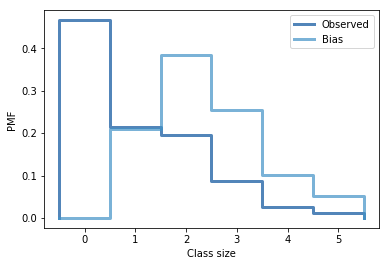

In [7]:
def BiasPmf(pmf, label):
    new_pmf = pmf.Copy(label=label)

    for x, p in pmf.Items():
        new_pmf.Mult(x, x)
        
    new_pmf.Normalize()
    return new_pmf

observed_pmf = ts.Pmf(resp.numkdhh, label = 'Observed')
bias_pmf = BiasPmf(unbias_pmf, label = 'Bias')

tp.PrePlot(2)
tp.Pmfs([observed_pmf, bias_pmf])
tp.Config(xlabel='Class size', ylabel='PMF')

**Exercise 3.2**

Write two function to compute the mean and variance from a PMF.

In [10]:
def PmfMean(pmf_object):
    item_list = []
    for i in pmf_object:
        item_list.append(i * pmf_object.Prob(i))
    return sum(item_list)

In [12]:
def PmfVar(pmf_object):
    item_list = []
    mean = PmfMean(pmf_object)
    for i in pmf_object:
        item_list.append(pmf_object.Prob(i) * (i - mean)**2)
    return sum(item_list)

In [14]:
print("La moyenne d'enfant dans le ménage est : ", PmfMean(observed_pmf))
print("L'écart type d'enfant dans le ménage est : ", math.sqrt(PmfVar(observed_pmf)))

La moyenne d'enfant dans le ménage est :  1.024205155043831
L'écart type d'enfant dans le ménage est :  1.1886396957670224


In [15]:
print("La moyenne d'enfant dans le ménage avec biais est : ", PmfMean(bias_pmf))
print("L'écart type d'enfant dans le ménage avec biais est : ", math.sqrt(PmfVar(bias_pmf)))

La moyenne d'enfant dans le ménage avec biais est :  2.403679100664282
L'écart type d'enfant dans le ménage avec biais est :  1.083176857907326
